In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
file_features = r"/content/Features_data_set.csv"
df_features = pd.read_csv(file_features)

file_sales = r"/content/sales_data_set.csv"
df_sales = pd.read_csv(file_sales)

file_stores = r"/content/stores_data_set.csv"
df_stores = pd.read_csv(file_stores)

In [5]:
print(df_features.head())
print(df_sales.head())
print(df_stores.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/201

In [6]:
f_df=df_features.copy()
sales_df=df_sales.copy()
stores_df=df_stores.copy()

In [7]:
df1 = pd.merge(sales_df, stores_df, on='Store', how='inner')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [8]:
# combine store and feature dataframe into single datarame based on 'store' column
df2 = pd.merge(stores_df, f_df, on='Store', how='inner')
df2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [9]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [10]:
df2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [11]:
# create unique column (diff) for the combination of store and date
df1['diff'] = df1['Store'].astype(str) + '-' + df1['Date']
df2['diff'] = df2['Store'].astype(str) + '-' + df2['Date']

In [12]:
print(df1.head(4))
print(df2.head(4))

   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size          diff
0      1     1  05/02/2010      24924.50      False    A  151315  1-05/02/2010
1      1     1  12/02/2010      46039.49       True    A  151315  1-12/02/2010
2      1     1  19/02/2010      41595.55      False    A  151315  1-19/02/2010
3      1     1  26/02/2010      19403.54      False    A  151315  1-26/02/2010
   Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0      1    A  151315  05/02/2010        42.31       2.572        NaN   
1      1    A  151315  12/02/2010        38.51       2.548        NaN   
2      1    A  151315  19/02/2010        39.93       2.514        NaN   
3      1    A  151315  26/02/2010        46.63       2.561        NaN   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        NaN        NaN        NaN        NaN  211.096358         8.106   
1        NaN        NaN        NaN        NaN  211.242170         8.106   
2        NaN  

In [13]:
#we need to take and fetch to new df with df2 2013 data and df1 of all data
# make list with diff column for df1
df1_list = df1['diff'].to_list()

In [14]:
# filter 2010 to 2012 data from df2 based on df1_list
df2_inlist = df2[df2['diff'].isin(df1_list)]

df2_inlist.reset_index(drop=True, inplace=True)
df2_inlist.head(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1-05/02/2010
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1-12/02/2010
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1-19/02/2010
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1-26/02/2010
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1-05/03/2010


In [15]:
# anther filter for 2012 to 2013 data from df2 not in df1_list (~)
df2_notinlist = df2[~df2['diff'].isin(df1_list)]

df2_notinlist.reset_index(drop=True, inplace=True)
df2_notinlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1750,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [16]:
print(df2.shape)
print(df2_inlist.shape)
print(df2_notinlist.shape)

(8190, 15)
(6435, 15)
(1755, 15)


In [17]:
# merge df1 and df2(2010 to 2012) data to df3
# merge using 'inner' based on exact 'diff' in both df

df3 = pd.merge(df1, df2_inlist, on='diff', how='inner')
df3.tail()

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,93,26/10/2012,2487.80,False,B,118221,45-26/10/2012,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,26/10/2012,5203.31,False,B,118221,45-26/10/2012,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,26/10/2012,56017.47,False,B,118221,45-26/10/2012,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,26/10/2012,6817.48,False,B,118221,45-26/10/2012,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [18]:
# drop the duplicate columns and rename
df3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)

In [19]:
df3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [20]:
#filter 'store' and 'dept' column from sales dataframe for department wise data
sd = sales_df[['Store','Dept']]
sd

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [21]:
# remove duplicates using the subset of 'store' and 'dept' columns
sd.drop_duplicates(subset=['Store','Dept'], inplace=True)
sd.reset_index(drop=True, inplace=True)
sd

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [22]:
# make df -'sd' and 'df2_notinlist (2012 to 2013)' based on 'store' column
# outer - it create rows for all combinations like (store,dept,date,etc.,)

df4 = pd.merge(sd, df2_notinlist, on='Store', how='outer')
df4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
129908,45,98,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [23]:
df4

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
0,1,1,A,151315,02/11/2012,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,1-02/11/2012
1,1,1,A,151315,09/11/2012,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,1-09/11/2012
2,1,1,A,151315,16/11/2012,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,1-16/11/2012
3,1,1,A,151315,23/11/2012,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,1-23/11/2012
4,1,1,A,151315,30/11/2012,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,1-30/11/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013


In [25]:
df3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [26]:
# concatinate both dataframes into single dataframe (2010 to 2013)
concat_df = pd.concat([df3, df4])

In [27]:
concat_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129904,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
129905,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
129906,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
129907,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [28]:
df5=concat_df.copy()

In [29]:
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129904,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
129905,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
129906,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
129907,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [30]:
df5=df5.reset_index(drop=True)
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [32]:
df5['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [33]:
#datatype conversion using pandas [28/06/2013]  --> [28-06-2013]
df5['Date'] = df5['Date'].apply(lambda x: x.replace('/','-'))

#date conversion using pandas
df5['Date'] = pd.to_datetime(df5['Date'], format='%d-%m-%Y', errors='coerce')

#label encoding for catagorical features into numerical
df5['IsHoliday'] = df5['IsHoliday'].map({True:1, False:0})
df5['Type'] = df5['Type'].map({'A':1, 'B':2, 'C':3})

df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,1,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,1,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,1,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,1,151315,1-05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,98,2013-06-28,NaN,0,2,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,2013-07-05,NaN,0,2,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,2013-07-12,NaN,0,2,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,2013-07-19,NaN,0,2,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [34]:
# drop 'diff' column and sort the dataframe in ascending order
df5.drop(columns=['diff'], inplace=True)


df5 = df5.sort_values(by=['Date','Store','Dept'])
df5.reset_index(drop=True, inplace=True)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [35]:
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [36]:
# make Date feature into --> Day,Month,Year new features and drop Date column
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Day'] = df5['Date'].dt.day
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [37]:
df5.drop(columns=['Date'], inplace=True)

In [38]:
# check null values of all features
df5.isnull().sum()

Store                0
Dept                 0
Weekly_Sales    129909
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Day                  0
Month                0
Year                 0
dtype: int64

In [39]:
#treat negative weekly_sales value convert to null value
df5['Weekly_Sales'] = df5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df5.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
551474,45,94,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551478,45,98,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [40]:
# rearrange the columns order
df5 = df5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df5.head()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [41]:
df5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [42]:
df_ml=df5.copy()

In [43]:
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [44]:
df_ml.corr()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Day,1.000000,0.042467,-0.005888,-0.000051,-0.000600,0.000159,-0.006265,-0.000215,0.066862,0.041784,0.022386,-0.260409,0.016305,0.143000,-0.307008,-0.040384,0.000842,0.003155
Month,0.042467,1.000000,-0.264813,-0.000166,-0.001214,-0.001271,0.028401,0.000895,0.144584,0.224674,-0.066568,-0.168365,0.012199,0.203994,-0.194952,0.060169,-0.002840,0.015343
Year,-0.005888,-0.264813,1.000000,0.008867,0.016878,0.011937,-0.010015,-0.016822,-0.053656,-0.038993,0.652064,0.079526,-0.120564,-0.164015,0.088618,-0.068642,0.086244,-0.302910
Store,-0.000051,-0.000166,0.008867,1.000000,0.019019,0.230268,-0.085117,-0.189536,-0.000308,-0.046309,0.075032,-0.109808,-0.038537,-0.028723,-0.000587,-0.001916,-0.210212,0.207291
Dept,-0.000600,-0.001214,0.016878,0.019019,1.000000,0.001843,0.148749,-0.001092,0.000914,-0.000099,0.007433,0.000264,0.001124,0.001786,0.002666,-0.000185,-0.005636,0.002766
Type,0.000159,-0.001271,0.011937,0.230268,0.001843,1.000000,-0.182229,-0.807532,-0.000460,0.041808,0.029551,-0.246973,-0.086469,-0.041395,-0.105364,-0.115305,-0.063850,0.136315
Weekly_Sales,-0.006265,0.028401,-0.010015,-0.085117,0.148749,-0.182229,1.000000,0.244117,0.012843,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806
Size,-0.000215,0.000895,-0.016822,-0.189536,-0.001092,-0.807532,0.244117,1.000000,0.000240,-0.060309,0.006218,0.330071,0.131498,0.049995,0.162901,0.140378,-0.005190,-0.053269
IsHoliday,0.066862,0.144584,-0.053656,-0.000308,0.000914,-0.000460,0.012843,0.000240,1.000000,-0.163436,-0.078295,0.165289,0.303368,0.455406,0.144389,-0.024686,0.001482,-0.003590
Temperature,0.041784,0.224674,-0.038993,-0.046309,-0.000099,0.041808,-0.002339,-0.060309,-0.163436,1.000000,0.096998,-0.114700,-0.322678,-0.075265,-0.061255,0.001661,0.168208,0.148478


In [46]:
def predict_ml(df, target_column, features, n_estimators=100, random_state=42):
    # Select features and target
    X_full = df[features]
    y_full = df[target_column]

    # Separate rows where target_column is not null
    X_train = X_full[df[target_column].notnull()]
    y_train = y_full[df[target_column].notnull()]

    # Separate rows where target_column is null
    X_test = X_full[df[target_column].isnull()]

    # Initialize the model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Predict missing values
    predictions = model.predict(X_test)

    # Return predictions as a Series
    return pd.Series(predictions, index=X_test.index)

In [47]:
predicted_values1 = predict_ml(df_ml, 'MarkDown1', ['Store', 'Size', 'Temperature', 'Fuel_Price'])

# Fill the missing values
df_ml.loc[df_ml['MarkDown1'].isnull(), 'MarkDown1'] = predicted_values1
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN


In [48]:
predicted_values2 = predict_ml(df_ml, 'MarkDown2', ['Store', 'Size', 'Temperature', 'Fuel_Price'])

# Fill the missing values
df_ml.loc[df_ml['MarkDown2'].isnull(), 'MarkDown2'] = predicted_values2
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,1979.898,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,1979.898,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,1979.898,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,1979.898,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,1979.898,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN


In [49]:
predicted_values3 = predict_ml(df_ml, 'MarkDown3', ['Store', 'Size', 'Temperature', 'Fuel_Price'])

# Fill the missing values
df_ml.loc[df_ml['MarkDown3'].isnull(), 'MarkDown3'] = predicted_values3
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.88,1864.57,NaN,NaN


In [50]:
predicted_values4 = predict_ml(df_ml, 'MarkDown4', ['Store', 'Size', 'Temperature', 'Fuel_Price'])

# Fill the missing values
df_ml.loc[df_ml['MarkDown4'].isnull(), 'MarkDown4'] = predicted_values4
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,NaN,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,NaN,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,NaN,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,NaN,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN


In [51]:
predicted_values5 = predict_ml(df_ml, 'MarkDown5', ['Store', 'Size', 'Temperature', 'Fuel_Price'])

# Fill the missing values
df_ml.loc[df_ml['MarkDown5'].isnull(), 'MarkDown5'] = predicted_values5
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN


In [52]:
predicted_values_cpi = predict_ml(df_ml, 'CPI', ['Store', 'Dept', 'Type', 'Size',
                                        'IsHoliday', 'Temperature','MarkDown1','MarkDown2',
                                        'MarkDown3','MarkDown4','MarkDown5','Fuel_Price'])

# Fill the missing values
df_ml.loc[df_ml['CPI'].isnull(), 'CPI'] = predicted_values_cpi
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,NaN


In [53]:
predicted_values_Unemployment = predict_ml(df_ml, 'Unemployment', ['Store', 'Dept', 'Type', 'Size',
                                                                    'IsHoliday', 'Temperature','MarkDown1',
                                                                    'MarkDown2','MarkDown3','MarkDown4','MarkDown5',
                                                                    'Fuel_Price','CPI'])

# Fill the missing values
df_ml.loc[df_ml['Unemployment'].isnull(), 'Unemployment'] = predicted_values_Unemployment
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567


In [54]:
predicted_values_Weekly_Sales = predict_ml(df_ml, 'Weekly_Sales', ['Day','Month','Year', 'Store', 'Dept', 'Type', 'Size',
            'IsHoliday', 'Temperature','MarkDown1','MarkDown2','MarkDown3',
            'MarkDown4','MarkDown5','Fuel_Price','CPI', 'Unemployment'])

# Fill the missing values in weekly sales
df_ml.loc[df_ml['Weekly_Sales'].isnull(), 'Weekly_Sales'] = predicted_values_Weekly_Sales
df_ml

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.5000,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
1,5,2,2010,1,2,1,50605.2700,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
2,5,2,2010,1,3,1,13740.1200,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
3,5,2,2010,1,4,1,39954.0400,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
4,5,2,2010,1,5,1,32229.3800,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,3948.3551,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551475,26,7,2013,45,95,2,56535.9091,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551476,26,7,2013,45,96,2,6358.4992,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551477,26,7,2013,45,97,2,5961.4814,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567


In [57]:
predicted_values_Weekly_Sales

389         112.4869
601          32.4524
714         102.9038
1039         53.4874
1345        168.6850
             ...    
551474     3948.3551
551475    56535.9091
551476     6358.4992
551477     5961.4814
551478     2214.5732
Length: 131267, dtype: float64

In [55]:
df_ml.isnull().sum()

Day             0
Month           0
Year            0
Store           0
Dept            0
Type            0
Weekly_Sales    0
Size            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [56]:
df_ml.to_csv(r"/content/Cleaned_data.csv", index=False)

In [58]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
orig_ndf1=pd.read_csv(r'/content/Cleaned_data.csv')

In [60]:
ndf1=orig_ndf1.copy()
ndf1.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'Weekly_Sales', 'Size',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

##  FEATURE ENGINEERING

In [61]:
ndf1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.5000,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
1,5,2,2010,1,2,1,50605.2700,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
2,5,2,2010,1,3,1,13740.1200,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
3,5,2,2010,1,4,1,39954.0400,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
4,5,2,2010,1,5,1,32229.3800,151315,0,42.31,2.572,8915.0802,1979.898,190.7138,162.2133,2625.3905,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,3948.3551,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551475,26,7,2013,45,95,2,56535.9091,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551476,26,7,2013,45,96,2,6358.4992,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567
551477,26,7,2013,45,97,2,5961.4814,118221,0,76.06,3.804,212.0200,851.730,2.0600,10.8800,1864.5700,189.527109,8.567


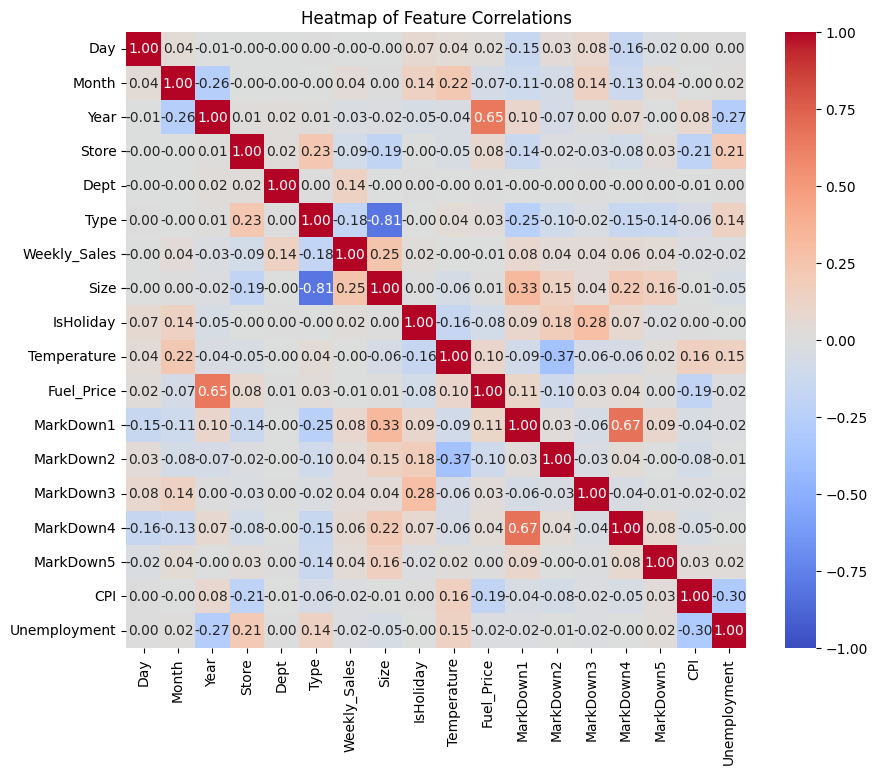

In [62]:
# Calculate the correlation matrix
corr_matrix = ndf1.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Feature Correlations')
plt.show()

1. Extract Correlation with Target Variable
-   First, let's identify features that are highly correlated with the target variable Weekly_Sales.

In [63]:
#extract the correlation of each feature with the target variable
corr_with_target = corr_matrix['Weekly_Sales'].sort_values(ascending=False)
print(corr_with_target)

Weekly_Sales    1.000000
Size            0.245901
Dept            0.139887
MarkDown1       0.084291
MarkDown4       0.059021
MarkDown5       0.041641
MarkDown3       0.038551
MarkDown2       0.038182
Month           0.037142
IsHoliday       0.016950
Temperature    -0.000211
Day            -0.002689
Fuel_Price     -0.005777
CPI            -0.019841
Unemployment   -0.020203
Year           -0.030055
Store          -0.085901
Type           -0.183499
Name: Weekly_Sales, dtype: float64


2. Filter Features Based on Correlation Threshold
-   Set a threshold to filter out features that are weakly correlated with the target variable.

In [64]:
# Set a threshold for correlation
correlation_threshold = 0.01

# Select features with correlation above the threshold
selected_features = corr_with_target[abs(corr_with_target) > correlation_threshold].index
print("Selected Features based on correlation threshold:")
print(selected_features)

Selected Features based on correlation threshold:
Index(['Weekly_Sales', 'Size', 'Dept', 'MarkDown1', 'MarkDown4', 'MarkDown5',
       'MarkDown3', 'MarkDown2', 'Month', 'IsHoliday', 'CPI', 'Unemployment',
       'Year', 'Store', 'Type'],
      dtype='object')


3. Feature Importance from Models
-   If using a model like RandomForestRegressor, you can get feature importance scores.

         Feature  Importance
1           Dept    0.634452
0           Size    0.180867
12         Store    0.055830
7          Month    0.031514
9            CPI    0.024636
5      MarkDown3    0.020853
13          Type    0.014386
10  Unemployment    0.009601
3      MarkDown4    0.006196
2      MarkDown1    0.005431
8      IsHoliday    0.005245
6      MarkDown2    0.005110
4      MarkDown5    0.004064
11          Year    0.001814


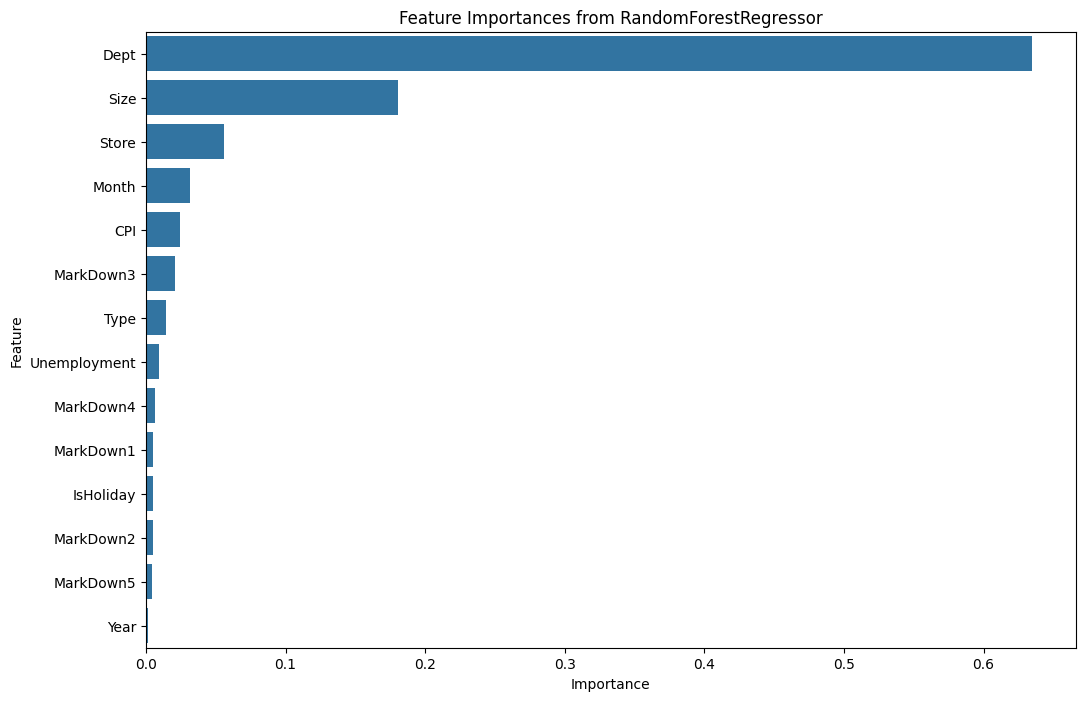

In [65]:
# Prepare data for modeling
X = ndf1[selected_features].drop(columns='Weekly_Sales')
y = ndf1['Weekly_Sales']

# Train a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from RandomForestRegressor')
plt.show()

In [66]:
# Decide the number of top features to retain
num_top_features = 7
# Select top features
top_features = feature_importance_df.head(num_top_features)['Feature']
print("Top Features selected for modeling:")
print(top_features)

Top Features selected for modeling:
1          Dept
0          Size
12        Store
7         Month
9           CPI
5     MarkDown3
13         Type
Name: Feature, dtype: object


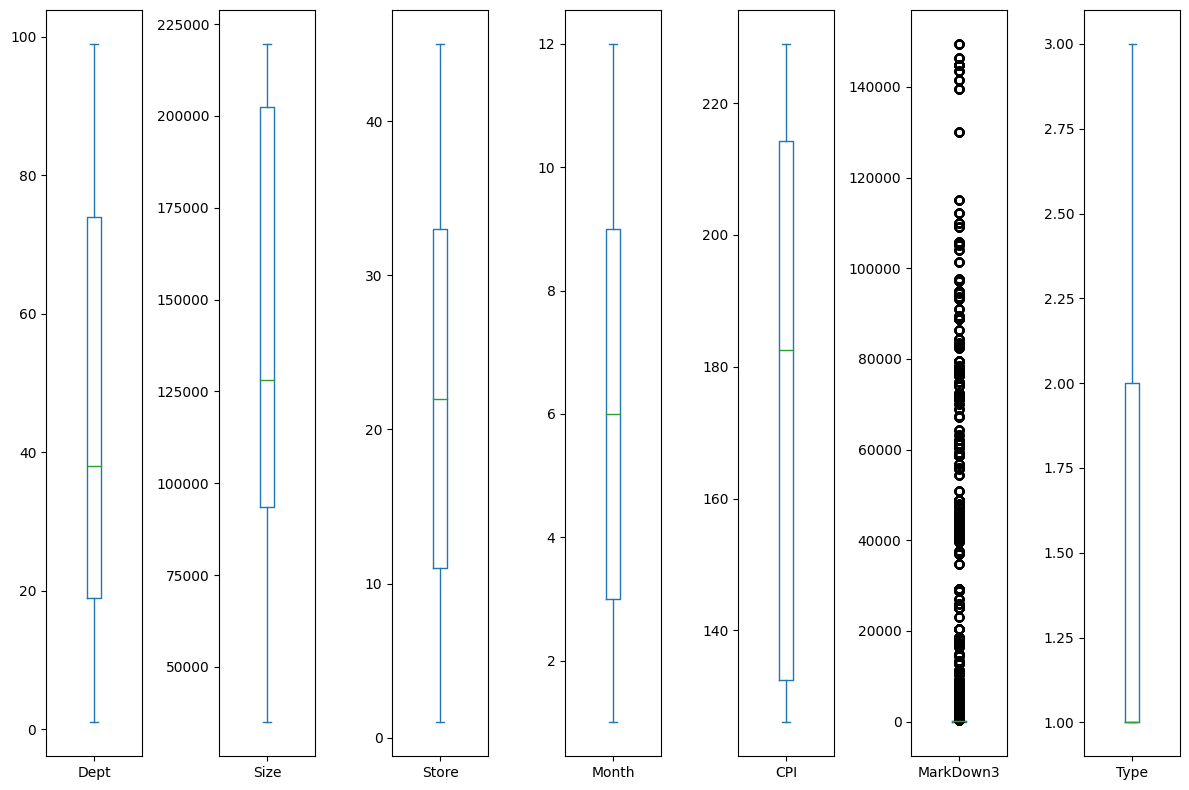

In [67]:
import matplotlib.pyplot as plt

def plot_boxplot(df):
    df.plot(kind='box', subplots=True, layout=(1, len(df.columns)), figsize=(12, 8), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

# Plot box plots
plot_boxplot(ndf1[top_features])


#drop the over deviated columns and it's contribution also less so we can..

In [70]:
# Correctly dropping 'MarkDown3' column from ndf1
ndf1.drop(columns=['MarkDown3'], inplace=True)

In [71]:
#ndf1.columns
print(ndf1[top_features].columns)

Index(['Dept', 'Size', 'Store', 'Month', 'CPI', 'Type'], dtype='object')


In [73]:
# If you want to keep only the top features (excluding 'MarkDown3' and 'Unemployment')
top_features = [feature for feature in top_features if feature not in ['MarkDown3', 'Unemployment']]
print(ndf1[top_features])


        Dept    Size  Store  Month         CPI  Type
0          1  151315      1      2  211.096358     1
1          2  151315      1      2  211.096358     1
2          3  151315      1      2  211.096358     1
3          4  151315      1      2  211.096358     1
4          5  151315      1      2  211.096358     1
...      ...     ...    ...    ...         ...   ...
551474    94  118221     45      7  189.527109     2
551475    95  118221     45      7  189.527109     2
551476    96  118221     45      7  189.527109     2
551477    97  118221     45      7  189.527109     2
551478    98  118221     45      7  189.527109     2

[551479 rows x 6 columns]


#   Steps to Build a Deep Learning Model
-   Import Libraries
-   Data Preparation
-   Build the Model
-   Compile the Model
-   Train the Model
-   Evaluate the Model
-   Make Predictions

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


1. Data Preparation
-   Ensure your data is prepared, scaling features, and splitting the data into training and testing sets.

In [75]:
# Prepare the data
X = ndf1[top_features]
y = ndf1['Weekly_Sales']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


2. Build the Model
-   Define the architecture of your neural network.

In [76]:
# Build the model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add dropout to prevent overfitting
model.add(Dropout(0.2))

# Add third hidden layer
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1))

3. Compile the Model
-   Specify the optimizer, loss function, and metrics.

In [77]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

4. Train the Model
-   Fit the model to the training data.

In [78]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/5
11030/11030 [==============================] - 19s 2ms/step - loss: 442563840.0000 - mean_squared_error: 442563840.0000 - val_loss: 394716864.0000 - val_mean_squared_error: 394716864.0000
Epoch 2/5
11030/11030 [==============================] - 17s 2ms/step - loss: 403588992.0000 - mean_squared_error: 403588992.0000 - val_loss: 381703712.0000 - val_mean_squared_error: 381703712.0000
Epoch 3/5
11030/11030 [==============================] - 18s 2ms/step - loss: 394408768.0000 - mean_squared_error: 394408768.0000 - val_loss: 375765088.0000 - val_mean_squared_error: 375765088.0000
Epoch 4/5
11030/11030 [==============================] - 17s 2ms/step - loss: 390236320.0000 - mean_squared_error: 390236320.0000 - val_loss: 372048640.0000 - val_mean_squared_error: 372048640.0000
Epoch 5/5
11030/11030 [==============================] - 17s 2ms/step - loss: 386762016.0000 - mean_squared_error: 386762016.0000 - val_loss: 369032384.0000 - val_mean_squared_error: 369032384.0000


5. Evaluate the Model
-   Assess the model's performance on the testing data.

3447/3447 [==============================] - 4s 1ms/step - loss: 380105792.0000 - mean_squared_error: 380105792.0000
Test Mean Squared Error: 380105792.0


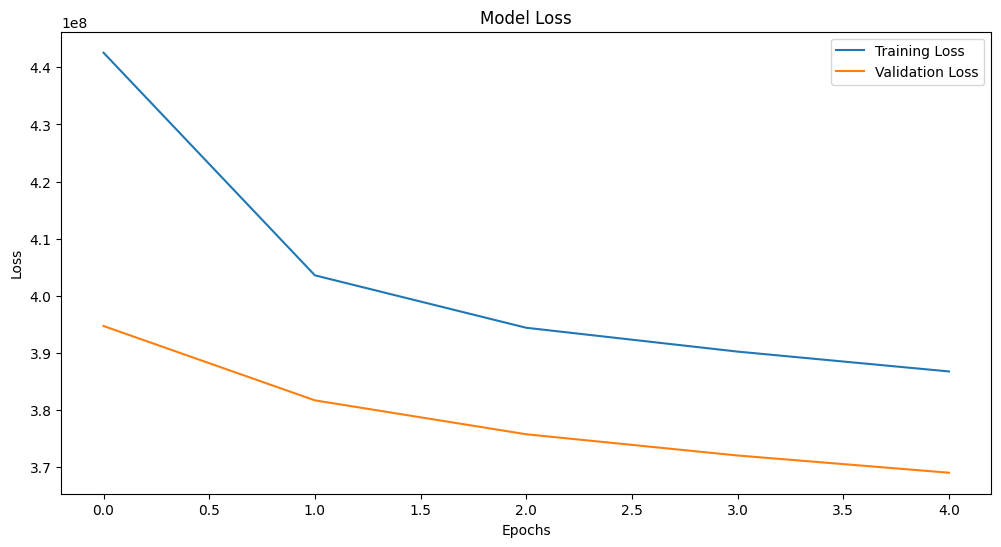

In [79]:
# Evaluate the model
test_loss, test_mse = model.evaluate(X_test, y_test)
print("Test Mean Squared Error:", test_mse)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


6. Make Predictions
-   Use the trained model to make predictions.

3447/3447 [==============================] - 3s 859us/step
Mean Squared Error on Test Data: 380105921.74030745
R-squared on Test Data: 0.2631799430915096


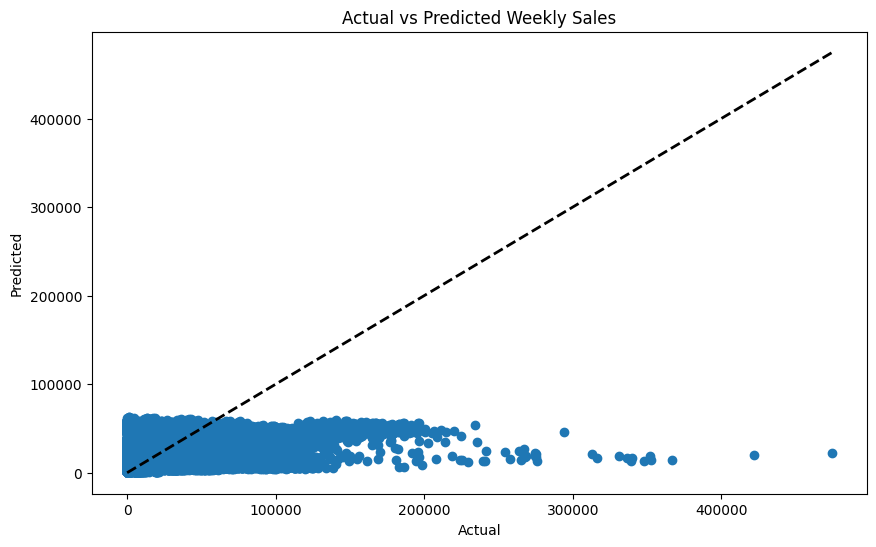

In [80]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Test Data:", mse)
print("R-squared on Test Data:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()

#   Impact Analysis of Promotions and Holidays
1.  select the Features

In [89]:
ndf1['MarkDown3']= orig_ndf1['MarkDown3']

In [90]:
# Create binary indicators for holidays and promotions if not already present
ndf1['IsHoliday'] = ndf1['IsHoliday'].astype(int)

# Assume MarkDown1 to MarkDown5 indicate promotions
ndf1['Promotion'] = ndf1[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [91]:
ndf1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown4,MarkDown5,CPI,Unemployment,MarkDown3,Promotion
0,5,2,2010,1,1,1,24924.5000,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
1,5,2,2010,1,2,1,50605.2700,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
2,5,2,2010,1,3,1,13740.1200,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
3,5,2,2010,1,4,1,39954.0400,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
4,5,2,2010,1,5,1,32229.3800,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,3948.3551,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1
551475,26,7,2013,45,95,2,56535.9091,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1
551476,26,7,2013,45,96,2,6358.4992,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1
551477,26,7,2013,45,97,2,5961.4814,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1


In [92]:
ndf1['Promotion'].unique()

array([1, 0])

2. Statistical Analysis
Perform statistical tests to determine if the differences in sales are significant.

In [93]:
from scipy.stats import ttest_ind

# Compare sales on holidays vs non-holidays
holiday_sales = ndf1[ndf1['IsHoliday'] == 1]['Weekly_Sales']
non_holiday_sales = ndf1[ndf1['IsHoliday'] == 0]['Weekly_Sales']
t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales)
print(f'T-test result for holidays vs non-holidays: t-statistic = {t_stat}, p-value = {p_val}')

# Compare sales with promotions vs without promotions
promo_sales = ndf1[ndf1['Promotion'] == 1]['Weekly_Sales']
no_promo_sales = ndf1[ndf1['Promotion'] == 0]['Weekly_Sales']
t_stat, p_val = ttest_ind(promo_sales, no_promo_sales)
print(f'T-test result for promotions vs no promotions: t-statistic = {t_stat}, p-value = {p_val}')

T-test result for holidays vs non-holidays: t-statistic = 12.588841545555695, p-value = 2.46036243036257e-36
T-test result for promotions vs no promotions: t-statistic = 3.014584369965234, p-value = 0.0025734332317675097


3. Modeling and Interpretation
-   Build a regression model to quantify the impact of holidays and promotions.

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
features = ['IsHoliday', 'Promotion']
X = ndf1[features]
y = ndf1['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 515824757.5457929
R-squared: 9.443296869404705e-05
           Coefficient
IsHoliday  1602.194719
Promotion  7846.525650


##      Coefficients
These coefficients are from a linear model which predicts the weekly sales based on the features 'IsHoliday' and 'Promotion'.

#   IsHoliday:

Coefficient: 1602.194719
-   Explanation: This coefficient indicates that, holding all else constant, the weekly sales increase by approximately 1602.194719 units when there is a holiday. It shows the impact of holidays on weekly sales. A positive coefficient means that holidays are associated with an increase in sales.

#Promotion:

#   Coefficient: 7846.525650
-   Explanation: This coefficient indicates that, holding all else constant, the weekly sales increase by approximately 7846.525650 units when there is a promotion. This shows the impact of promotions on weekly sales. A positive coefficient means that promotions are associated with a significant increase in sales.

#   Sales Forecasts: Accurate weekly sales predictions for each department

In [95]:
ndf1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown4,MarkDown5,CPI,Unemployment,MarkDown3,Promotion
0,5,2,2010,1,1,1,24924.5000,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
1,5,2,2010,1,2,1,50605.2700,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
2,5,2,2010,1,3,1,13740.1200,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
3,5,2,2010,1,4,1,39954.0400,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
4,5,2,2010,1,5,1,32229.3800,151315,0,42.31,2.572,8915.0802,1979.898,162.2133,2625.3905,211.096358,8.106,190.7138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,3948.3551,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1
551475,26,7,2013,45,95,2,56535.9091,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1
551476,26,7,2013,45,96,2,6358.4992,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1
551477,26,7,2013,45,97,2,5961.4814,118221,0,76.06,3.804,212.0200,851.730,10.8800,1864.5700,189.527109,8.567,2.0600,1


In [96]:
ndf1.rename(columns={"Day": "Date"}, inplace=True)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract date features
ndf1['Date'] = pd.to_datetime(ndf1['Date'])
ndf1['DayOfWeek'] = ndf1['Date'].dt.dayofweek
ndf1['Month'] = ndf1['Date'].dt.month
ndf1['Year'] = ndf1['Date'].dt.year
ndf1['IsHoliday'] = ndf1['IsHoliday'].astype(int)

# Normalize/Standardize features
scaler = StandardScaler()
ndf1[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = scaler.fit_transform(
    ndf1[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])

# Lag features
ndf1['Weekly_Sales_Lag1'] = ndf1.groupby('Dept')['Weekly_Sales'].shift(1)
ndf1['Weekly_Sales_Lag2'] = ndf1.groupby('Dept')['Weekly_Sales'].shift(2)
ndf1['Weekly_Sales_Lag3'] = ndf1.groupby('Dept')['Weekly_Sales'].shift(3)

# Rolling statistics
ndf1['Weekly_Sales_Mean'] = ndf1.groupby('Dept')['Weekly_Sales'].transform(lambda x: x.rolling(window=3).mean())

# Drop rows with NaN values after creating lag features
ndf1.dropna(inplace=True)

# Select features and target
features = ['Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'DayOfWeek', 'Month', 'Year', 'IsHoliday',
            'Weekly_Sales_Lag1', 'Weekly_Sales_Lag2', 'Weekly_Sales_Lag3', 'Weekly_Sales_Mean']
target = 'Weekly_Sales'

X = ndf1[features]
y = ndf1[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

MAE: 0.01915091098598989
MSE: 0.006349696453380211
R-squared: 0.9937349380415482


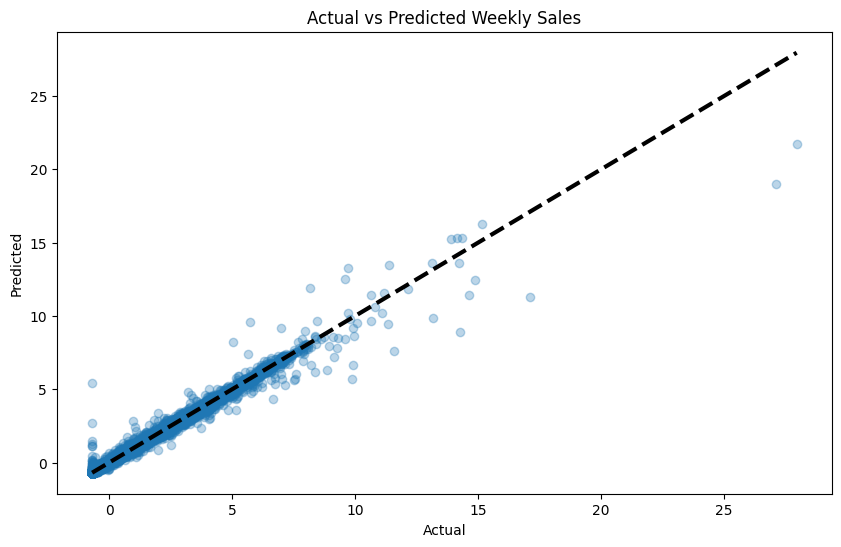

In [99]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


#   Mean Absolute Error (MAE):

Value: 0.01915091098598989
-   Explanation: The Mean Absolute Error measures the average absolute difference between the predicted values and the actual values. A lower MAE indicates better model performance. In this case, the MAE is very low, suggesting that the model's predictions are close to the actual values on average.

#   Mean Squared Error (MSE):

Value: 0.006349696453380211
-   Explanation: The Mean Squared Error measures the average of the squares of the errors. Like the MAE, a lower MSE indicates a better fit. The very low MSE here indicates that the model's predictions are quite close to the actual values, with only small errors.

#   R-squared (R²):

Value:  0.9937349380415482
-   Explanation: R-squared is a statistical measure that represents the proportion of the variance for the dependent variable (weekly sales) that's explained by the independent variables in the model. An R-squared value close to 1 indicates that the model explains almost all of the variance in the dependent variable. In this case, the R-squared value of 0.9937349380415482 suggests that the model explains almost 99.34% of the variance in weekly sales, indicating an excellent fit.

# needed feature
-   from location
-   age
-   billing value
-   genre